In [2]:
import pandas as pd
import geopandas as gpd
from scipy.stats import spearmanr

In [3]:
polygon = gpd.read_file('/Users/duan114/Downloads/Hearing loss project/coutinuous states_county level')

In [4]:
vd = pd.read_csv('/Users/duan114/Downloads/vd21.csv')
cog = pd.read_csv('/Users/duan114/Downloads/cog21.csv')
amb = pd.read_csv('/Users/duan114/Downloads/amb21.csv')
self = pd.read_csv('/Users/duan114/Downloads/self21.csv')

In [5]:
vd['vdr']=vd['vdr_ad21']
cog['cogr']=cog['cogr_ad21']
amb['ambr']=amb['ambr_ad21']
self['selfr']=self['selfr_ad21']

In [6]:
from functools import reduce

dfs = [vd, cog, amb, self]  
merged_df = reduce(lambda left, right: pd.merge(left, right, on='FIPS', how='left'), dfs)

/var/folders/ch/jnm4tqzx5vs9wyxp0ls6q_br0000gp/T/ipykernel_49989/1861702949.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x', 'STATE_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left, right: pd.merge(left, right, on='FIPS', how='left'), dfs)


In [7]:
merged_df.columns

Index(['Unnamed: 0_x', 'STATE_x', 'FIPS', 'vdr_ad21', 'vdr', 'Unnamed: 0_y',
       'STATE_y', 'male_cog_ad', 'female_cog_ad', 'male_cogr_ad',
       'female_cogr_ad', 'cog_ad', 'cogr_ad21', 'cogr', 'Unnamed: 0_x',
       'STATE_x', 'male_amb_ad', 'female_amb_ad', 'male_ambr_ad',
       'female_ambr_ad', 'amb_ad', 'ambr_ad21', 'ambr', 'Unnamed: 0_y',
       'STATE_y', 'male_self_ad', 'female_self_ad', 'male_selfr_ad',
       'female_selfr_ad', 'self_ad', 'selfr_ad21', 'selfr'],
      dtype='object')

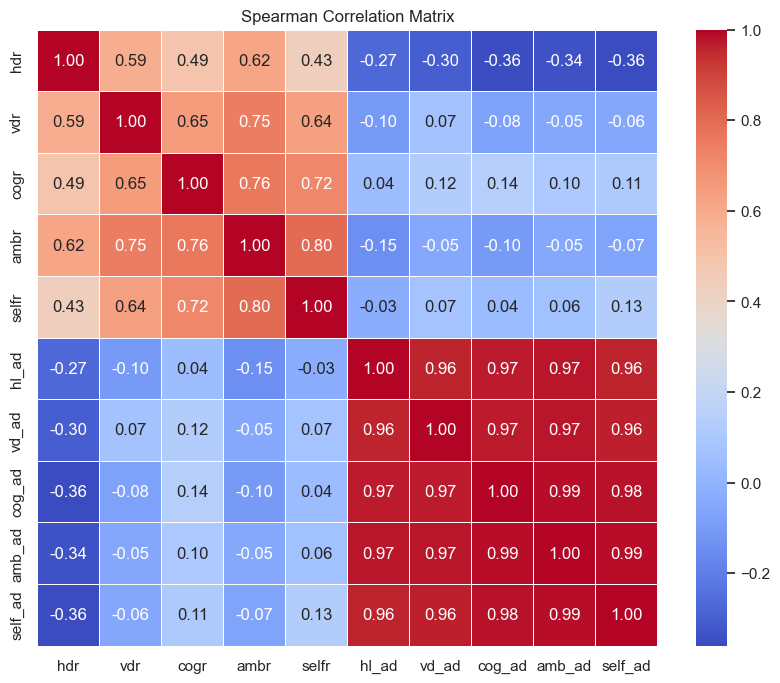

In [203]:
columns_of_interest = ['hdr', 'vdr', 'cogr', 'ambr', 'selfr', 'hl_ad', 'vd_ad', 'cog_ad', 'amb_ad', 'self_ad']
spearman_corr_matrix = merged_df[columns_of_interest].corr(method='spearman')

sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()


In [17]:
df1 = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/paper writing/data/data1.csv')

In [18]:
df1.FIPS = df1.FIPS.astype(int)

In [19]:
merged_df.FIPS = merged_df.FIPS.astype(int)

In [20]:
df2 = df1.merge(merged_df,on='FIPS',how='left')

In [12]:
road = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/Hearing Loss/Transportation/edge_len_data/edge_len_new.csv')
road_length = road[['FIPS','edge_len']]

In [13]:
df2 = df2.merge(road_length,on='FIPS',how='left')

In [22]:
df2.columns

Index(['Unnamed: 0', 'FIPS', 'population', 'hearing loss rate',
       'Risky POI density', 'median income', 'poverty fraction',
       'uninsured fraction', 'sex ratio', 'old dependency ratio',
       '% over bachelor', '% below highschool', 'poi_amount', 'AREA_SQMI',
       'edge_len', 'road density', 'POI density',
       'Index of relative ruruality', 'Unnamed: 0_x', 'STATE_x', 'vdr_ad21',
       'vdr', 'Unnamed: 0_y', 'STATE_y', 'male_cog_ad', 'female_cog_ad',
       'male_cogr_ad', 'female_cogr_ad', 'cog_ad', 'cogr_ad21', 'cogr',
       'Unnamed: 0_x', 'STATE_x', 'male_amb_ad', 'female_amb_ad',
       'male_ambr_ad', 'female_ambr_ad', 'amb_ad', 'ambr_ad21', 'ambr',
       'Unnamed: 0_y', 'STATE_y', 'male_self_ad', 'female_self_ad',
       'male_selfr_ad', 'female_selfr_ad', 'self_ad', 'selfr_ad21', 'selfr'],
      dtype='object')

In [23]:
df2.columns = ['Unnamed: 0', 'FIPS', 'population', 'Hearing difficulty rate',
       'Risky POI density', 'median income', 'poverty fraction',
       'uninsured fraction', 'sex ratio', 'old dependency ratio',
       '% over bachelor', '% below highschool', 'poi_amount', 'AREA_SQMI',
       'edge_len', 'Road density', 'POI density',
       'Index of relative ruruality', 'Unnamed: 0_x', 'STATE_x', 'vdr_ad21',
       'Vision difficulty rate', 'Unnamed: 0_y', 'STATE_y', 'male_cog_ad', 'female_cog_ad',
       'male_cogr_ad', 'female_cogr_ad', 'cog_ad', 'cogr_ad21', 'Cognitive difficulty rate',
       'Unnamed: 0_x', 'STATE_x', 'male_amb_ad', 'female_amb_ad',
       'male_ambr_ad', 'female_ambr_ad', 'amb_ad', 'ambr_ad21', 'Ambulatory difficulty rate',
       'Unnamed: 0_y', 'STATE_y', 'male_self_ad', 'female_self_ad',
       'male_selfr_ad', 'female_selfr_ad', 'self_ad', 'selfr_ad21', 'Selfcare difficulty rate']

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

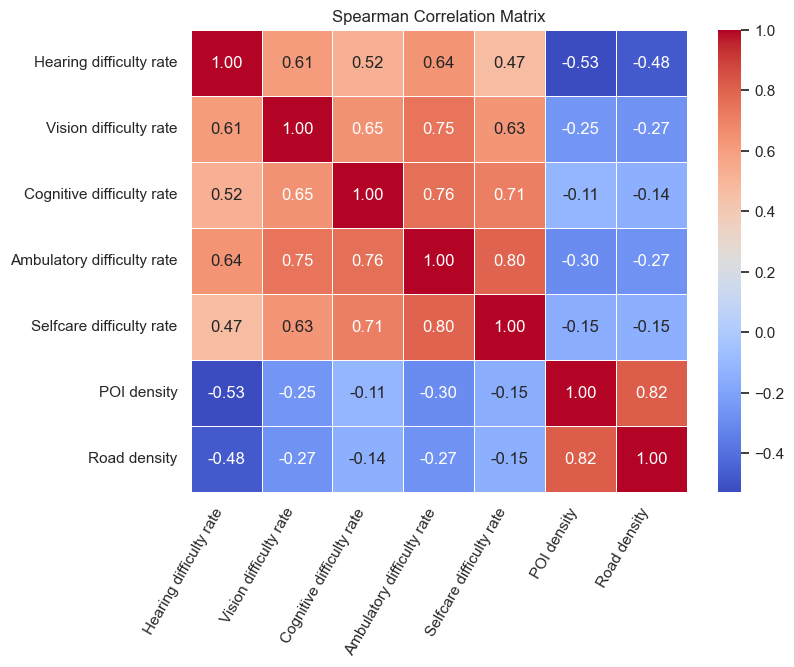

In [35]:
columns_of_interest = ['Hearing difficulty rate', 'Vision difficulty rate', 'Cognitive difficulty rate', 'Ambulatory difficulty rate', 'Selfcare difficulty rate','POI density','Road density']
spearman_corr_matrix = df2[columns_of_interest].corr(method='spearman')

sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.xticks(rotation=60, ha='right')
plt.yticks(rotation=0)  
plt.show()

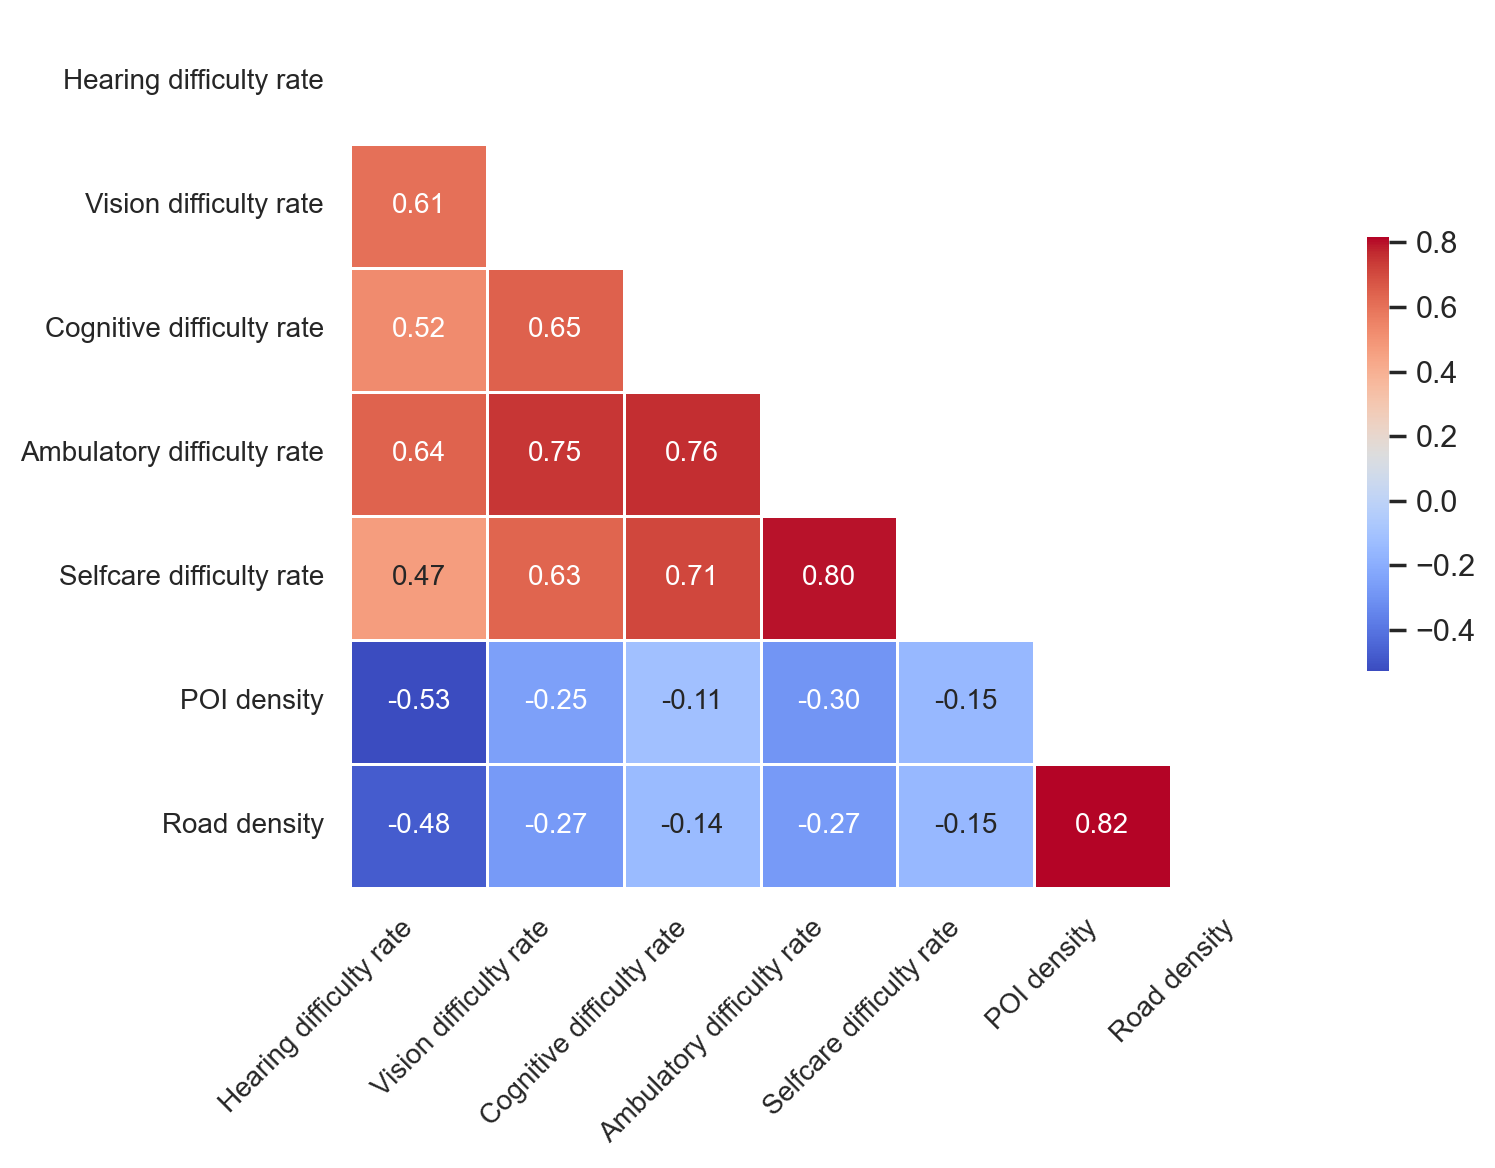

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
columns_of_interest = ['Hearing difficulty rate', 'Vision difficulty rate', 'Cognitive difficulty rate', 'Ambulatory difficulty rate', 'Selfcare difficulty rate','POI density','Road density']
spearman_corr_matrix = df2[columns_of_interest].corr(method='spearman')
mask = np.triu(np.ones_like(spearman_corr_matrix, dtype=bool))
sns.set(style="white")
plt.figure(figsize=(8, 6))
ax = sns.heatmap(spearman_corr_matrix, 
                 mask=mask, 
                 annot=True, 
                 cmap='coolwarm', 
                 linewidths=.5, 
                 fmt=".2f",
                 annot_kws={'size': 10},
                 cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  

ax.tick_params(axis='x', labelsize=10)  
ax.tick_params(axis='y', labelsize=10) 

plt.tight_layout()

plt.show()